In [273]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
import matplotlib.pyplot as plt

# Loading your IBM Q account(s)
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-melbourne')

ibmqfactory.load_account:WARNING:2021-05-17 11:31:20,416: Credentials are already in use. The existing account in the session will be replaced.


## Toffoli Gate

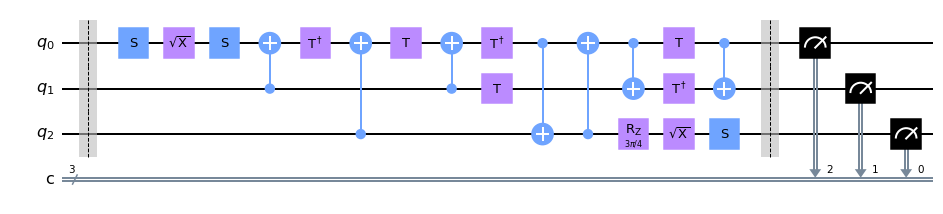

In [266]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.s(qreg_q[0])
circuit.sx(qreg_q[0])
circuit.s(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.tdg(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.t(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.tdg(qreg_q[0])
circuit.t(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.rz(3*pi/4, qreg_q[2])
circuit.t(qreg_q[0])
circuit.tdg(qreg_q[1])
circuit.sx(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.s(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.measure(qreg_q[0], creg_c[2])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[0])

circuit.draw()

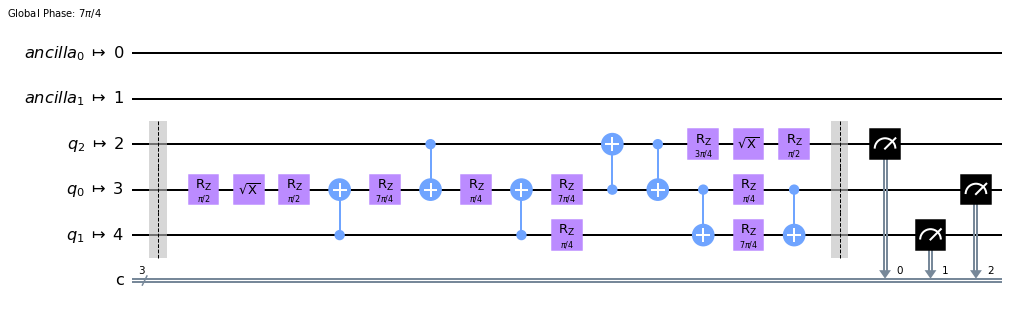

In [269]:
X000 = QuantumCircuit(qreg_q)
X001 = QuantumCircuit(qreg_q)
X001.x(qreg_q[0])
X010 = QuantumCircuit(qreg_q)
X010.x(qreg_q[1])
X011 = QuantumCircuit(qreg_q)
X011.x(qreg_q[1])
X011.x(qreg_q[0])
X100 = QuantumCircuit(qreg_q)
X100.x(qreg_q[2])
X101 = QuantumCircuit(qreg_q)
X101.x(qreg_q[2])
X101.x(qreg_q[0])
X110 = QuantumCircuit(qreg_q)
X110.x(qreg_q[2])
X110.x(qreg_q[1])
X111 = QuantumCircuit(qreg_q)
X111.x(qreg_q[2])
X111.x(qreg_q[1])
X111.x(qreg_q[0])

circuit_list = [
    X000 + circuit,
    X001 + circuit,
    X010 + circuit,
    X011 + circuit,
    X100 + circuit,
    X101 + circuit,
    X110 + circuit,
    X111 + circuit
]

transpile(circuit_list[0], backend, initial_layout=[3, 4, 2]).draw()

### Calibration

In [274]:
from qiskit.ignis.mitigation.measurement import complete_meas_cal, CompleteMeasFitter
qr = QuantumRegister(3)
cal_circuit_list, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

In [192]:
backend = provider.get_backend('ibmq_santiago')

In [193]:
# Run circuits
result = execute(circuit_list, backend, shots=1000, initial_layout=[3, 4, 2], optimization_level=1).result()
cal_result = execute(cal_circuit_list, backend, shots=8192, initial_layout=[3, 4, 2]).result()

In [195]:
noisy_counts = result.get_counts()
# Get the filter object
meas_fitter = CompleteMeasFitter(cal_result, state_labels, circlabel='mcal')
meas_filter = meas_fitter.filter
# Results with mitigation
mitigated_result = meas_filter.apply(result)
mitigated_counts = mitigated_result.get_counts()

In [288]:
title = 'Input: 110, F (Unmitigated): 0.731, F (Mitigated): 0.863'
fig = plot_histogram([noisy_counts[6], mitigated_counts[6]], title=title)
fig.set_size_inches(10, 6)
fig.savefig('toffoli_110', dpi=100)
fig

Traceback (most recent call last):
  File "<ipython-input-288-1c9b934cef21>", line 2, in <module>
    fig = plot_histogram([noisy_counts[6], mitigated_counts[6]], title=title)
KeyError: 6

Use %tb to get the full traceback.


## Grover's Algorithm

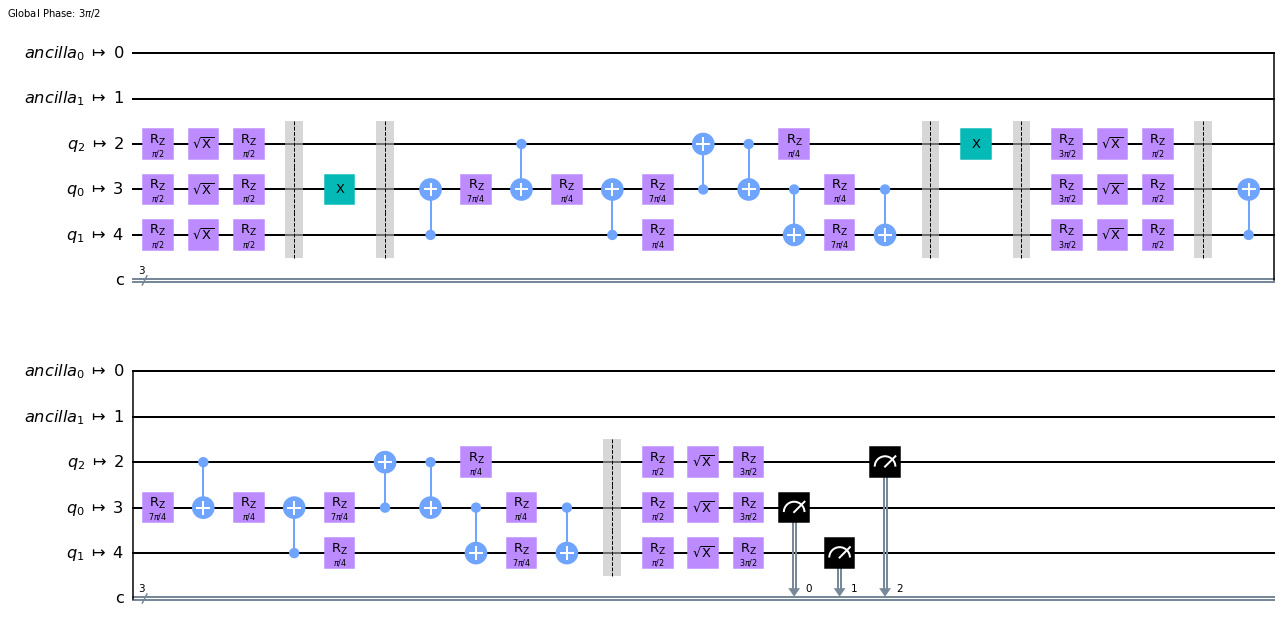

In [294]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.tdg(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.t(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.tdg(qreg_q[0])
circuit.t(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.t(qreg_q[2])
circuit.t(qreg_q[0])
circuit.tdg(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.tdg(qreg_q[0])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.t(qreg_q[0])
circuit.cx(qreg_q[1], qreg_q[0])
circuit.tdg(qreg_q[0])
circuit.t(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.t(qreg_q[2])
circuit.t(qreg_q[0])
circuit.tdg(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.x(qreg_q[0])
circuit.x(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])

cal_circuit_list, state_labels = complete_meas_cal(qr=qr, circlabel='mcal')

tcircuit = transpile(circuit, backend=backend, initial_layout=[3, 4, 2])
tcircuit.draw()

In [285]:
backend = provider.get_backend('ibmq_athens')

In [289]:
# Run circuits
cal_result = execute(cal_circuit_list, backend, shots=8192, initial_layout=[3, 4, 2]).result()
result = execute(circuit, backend, shots=1000, initial_layout=[3, 4, 2], optimization_level=1).result()

In [290]:
noisy_counts = result.get_counts()
# Get the filter object
meas_fitter = CompleteMeasFitter(cal_result, state_labels, circlabel='mcal')
meas_filter = meas_fitter.filter
# Results with mitigation
mitigated_result = meas_filter.apply(result)
mitigated_counts = mitigated_result.get_counts()

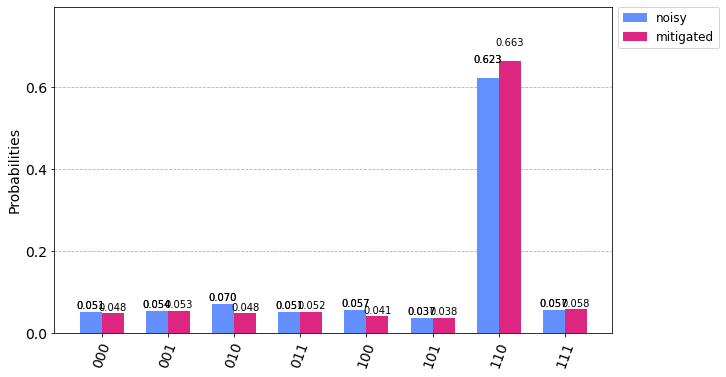

In [292]:
fig = plot_histogram([noisy_counts, mitigated_counts], legend=['noisy', 'mitigated'])
fig.set_size_inches(10, 6)
fig.savefig('grover_110', dpi=100)
fig